# The GRIP at Sparks Foundation Internship


# NAME: Patel Nency

# Task 4 (Understanding working with Decision Trees of Iris data)

In [1]:
#import required libraries
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x = iris.data
y = iris.target
d = [{"sepal_length":row[0], 
      "sepal_width":row[1], 
      "petal_length":row[2], 
      "petal_width":row[3]} for row in x]
df = pd.DataFrame(d) 
df["types"] = y 
df = df.sample(frac=1.0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,types
115,6.4,3.2,5.3,2.3,2
99,5.7,2.8,4.1,1.3,1
67,5.8,2.7,4.1,1.0,1
97,6.2,2.9,4.3,1.3,1
50,7.0,3.2,4.7,1.4,1


# Relationship between features:

In [2]:
import warnings
warnings.filterwarnings('ignore')

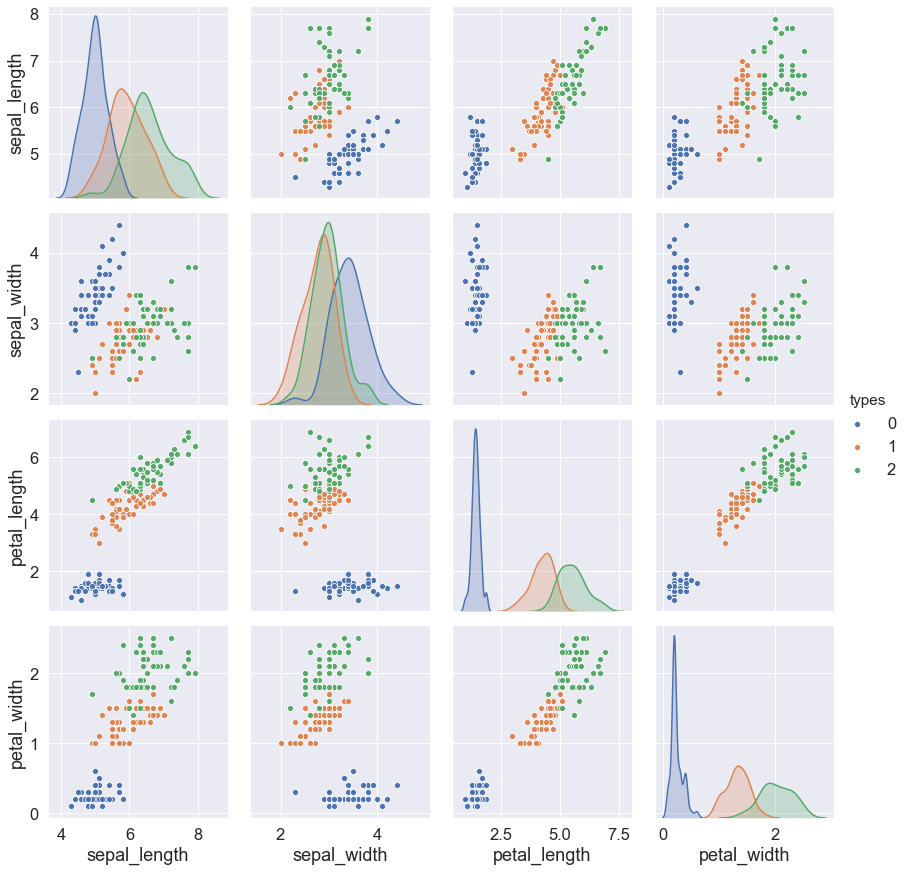

In [3]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.pairplot(df,hue="types",size=3);
plt.show()


In [4]:
#split the data into test and train
x = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["types"]
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, random_state=1)

# prediction

In [6]:
#import tree from scikit learn and create classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

In [7]:
prediction = clf.predict(test_x)

In [8]:
# evaluation for multi class classification
from sklearn.metrics import classification_report
print(classification_report(test_y, prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00         8
       type1       0.67      1.00      0.80         6
       type2       1.00      0.81      0.90        16

    accuracy                           0.90        30
   macro avg       0.89      0.94      0.90        30
weighted avg       0.93      0.90      0.90        30



# Let us visualize the Decision Tree to understand it better

In [9]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier = classifier.fit(train_x,train_y)

print("Decision Tree Classifier created successfully!")

Decision Tree Classifier created successfully!


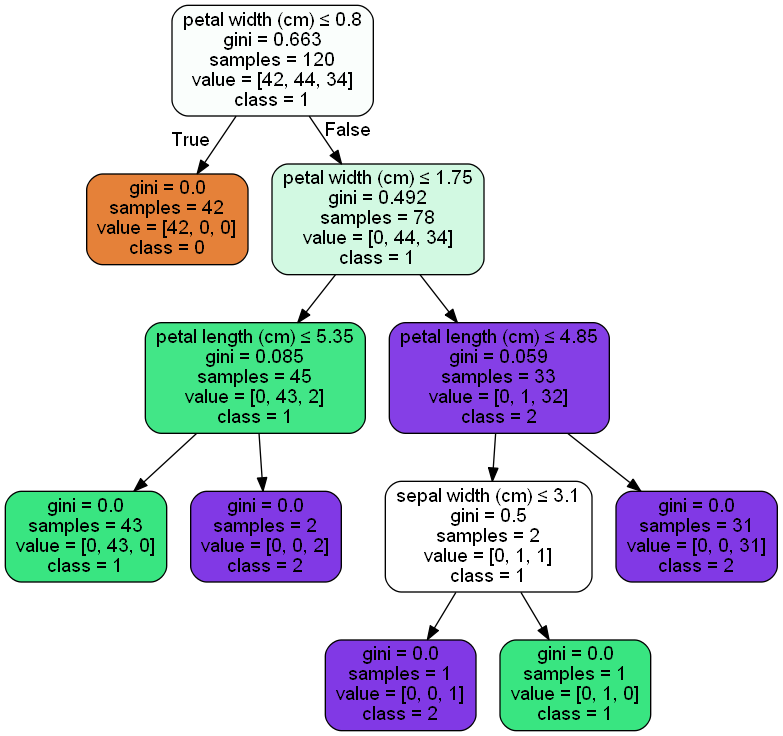

In [10]:
# Visualize the decision tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

# Thank You